# EDA on USA Deaths Dataset
- BY ANIKET KINAGE

### Introduction :

Dataset Source : https://www.data.gov/

#### Use Case : Understanding the main cause of deaths among various age groups in different regions of United States.

In this project I have investigated a dataset of diseases causing death for 9 different regions in United States. The data includes major diseases and states the number of people die with that disease. The analysis is focused on finding trends influencing the government to take early preventive and control measures such as providing medications, healthcare facilities, creating awareness,etc 

#### Dataset Description : 
This dataset contains death records of 9 different states in the United States from the year 
2019 to 2021. The dataset consists of 21 columns: (Death Year,Death Month,HHSRegion,AgeGroup,AllCause,
NaturalCause,Septicemia,Malignant neoplasms,Diabetes mellitus,Alzheimer disease,Influenza and pneumonia,Chronic respiratory diseases,Other respiratory diseases, Nephrotic syndrome ,Abnormal clinical and Laboratory findings,Heart Diseases, Cerebrovascular diseases ,COVID-19 ( Multiple Cause of Death),COVID-19 (Underlying Cause of Death), Total Deaths,AnalysisDate)


#### Important Questions to Ask?
1) In which month of the year we have recorded the highest and lowest mortality rate? \
2) Which are the age groups where heart disease is more common? \
3) Which disease caused maximum and minimum number of deaths from 2019 to 2021? \
4) In which two regions more people died due to diseases(excluding natural cause) \
5) Compare COVID-19(Multicause and onlycause) regionwise and check which region has more deaths due to COVID-19 onlycause.

In [1]:
# Importing Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Data Wrangling

In [2]:
# Loading dataset

df = pd.read_csv("AH_Monthly_Provisional_Counts_of_Deaths_by_Age_Group_and_HHS_region_for_Select_Causes_of_Death__2019-2021.csv")
df.shape


(3100, 21)

In [3]:
df.head(5)

,Death Year,Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia,Malignant neoplasms,Diabetes mellitus,Alzheimer disease,...,Chronic respiratory diseases,Other respiratory diseases,Nephrotic syndrome,Abnormal clinical and Laboratory findings,Heart Diseases,Cerebrovascular diseases,COVID-19 ( Multiple Cause of Death),COVID-19 (Underlying Cause of Death),Total Deaths,AnalysisDate
0,2019,1,Massachusetts,0-4 years,61.0,55.0,NaN,0.0,0.0,0.0,...,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,116,08/25/2021
1,2019,1,Massachusetts,15-24 years,77.0,17.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,94,08/25/2021
2,2019,1,Massachusetts,25-34 years,202.0,51.0,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,253,08/25/2021
3,2019,1,Massachusetts,35-44 years,269.0,142.0,NaN,33.0,NaN,0.0,...,NaN,0.0,NaN,NaN,23.0,NaN,0.0,0.0,467,08/25/2021
4,2019,1,Massachusetts,45-54 years,601.0,476.0,NaN,141.0,25.0,0.0,...,14.0,10.0,11.0,NaN,85.0,12.0,0.0,0.0,1390,08/25/2021


#### Exploring general properties of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Death Year                                 3100 non-null   int64  
 1   Death Month                                3100 non-null   int64  
 2   HHSRegion                                  3100 non-null   object 
 3   AgeGroup                                   3100 non-null   object 
 4   AllCause                                   3090 non-null   float64
 5   NaturalCause                               3032 non-null   float64
 6   Septicemia                                 2082 non-null   float64
 7   Malignant neoplasms                        2431 non-null   float64
 8   Diabetes mellitus                          2492 non-null   float64
 9   Alzheimer disease                          2740 non-null   float64
 10  Influenza and pneumonia 

Outcomes:
1) This shows that we have 21 columns in total besides index, and we have 3100 records.\
2) None of the data fields have NULL values.\

#### Checking Duplicate records

In [5]:
df.duplicated().sum()

0

Outcomes:
1) There are no duplicate rows in this dataset.

#### Typos in the column names as well as their format should be corrected or rectified 

In [6]:
df.columns

Index(['Death Year', 'Death Month', 'HHSRegion', 'AgeGroup', 'AllCause',
       'NaturalCause', 'Septicemia', 'Malignant neoplasms ',
       'Diabetes mellitus ', 'Alzheimer disease', 'Influenza and pneumonia ',
       'Chronic respiratory diseases ', 'Other respiratory diseases',
       'Nephrotic syndrome ', 'Abnormal clinical and Laboratory findings',
       'Heart Diseases', 'Cerebrovascular diseases ',
       'COVID-19 ( Multiple Cause of Death)',
       'COVID-19 (Underlying Cause of Death)', 'Total Deaths', 'AnalysisDate'],
      dtype='object')

In [7]:
df.columns = ['death_year', 'death_month', 'hhs_region', 'age_group','all_cause', 'natural_cause', 'septicemia',
           'malignant_neoplasms', 'diabetes_mellitus','alzheimer', 'influenza_pneumonia','chronic_respiratory', 'other_respiratory','neophrotic_syndrome',
            'abnormal_clinical_laboratory_findings','heart_diseases','cerebrovascular_diseases','covid-19_multicause','covid-19_onlycause','total_deaths','analysis_date']

df.columns

Index(['death_year', 'death_month', 'hhs_region', 'age_group', 'all_cause',
       'natural_cause', 'septicemia', 'malignant_neoplasms',
       'diabetes_mellitus', 'alzheimer', 'influenza_pneumonia',
       'chronic_respiratory', 'other_respiratory', 'neophrotic_syndrome',
       'abnormal_clinical_laboratory_findings', 'heart_diseases',
       'cerebrovascular_diseases', 'covid-19_multicause', 'covid-19_onlycause',
       'total_deaths', 'analysis_date'],
      dtype='object')

#### Checking if the range of the values is reasonable

In [8]:
# Gets statistical data about each column
df.describe(include="all") 

,death_year,death_month,hhs_region,age_group,all_cause,natural_cause,septicemia,malignant_neoplasms,diabetes_mellitus,alzheimer,...,chronic_respiratory,other_respiratory,neophrotic_syndrome,abnormal_clinical_laboratory_findings,heart_diseases,cerebrovascular_diseases,covid-19_multicause,covid-19_onlycause,total_deaths,analysis_date
count,3100.00000,3100.000000,3100,3100,3090.000000,3032.000000,2082.000000,2431.000000,2492.000000,2740.000000,...,2112.000000,1939.000000,2294.000000,2209.000000,2389.000000,2173.000000,2729.000000,2745.000000,3100.000000,3100
unique,NaN,NaN,9,10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,Massachusetts,0-4 years,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08/25/2021
freq,NaN,NaN,620,310,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3100
mean,2019.83871,5.935484,NaN,NaN,2634.219417,2457.178430,47.008165,633.370629,97.894864,117.330292,...,182.147727,57.226921,57.508718,50.774559,727.506907,183.640129,223.933675,200.899818,7082.054839,NaN
std,0.76621,3.350413,NaN,NaN,3647.522654,3595.803367,54.532035,752.757717,116.817810,271.670290,...,231.404414,63.780164,74.673008,63.283150,933.477735,261.276950,697.502314,637.772254,10473.808488,NaN
min,2019.00000,1.000000,NaN,NaN,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2019.00000,3.000000,NaN,NaN,242.000000,107.000000,0.000000,45.500000,7.500000,0.000000,...,0.000000,0.000000,0.000000,16.000000,53.000000,14.000000,0.000000,0.000000,393.000000,NaN
50%,2020.00000,6.000000,NaN,NaN,1005.500000,639.500000,27.000000,381.000000,56.000000,0.000000,...,105.000000,37.000000,25.000000,30.000000,343.000000,75.000000,0.000000,0.000000,1970.500000,NaN
75%,2020.00000,9.000000,NaN,NaN,3464.000000,3279.000000,74.000000,956.000000,149.000000,100.000000,...,261.000000,91.500000,89.000000,59.000000,1075.000000,236.000000,101.000000,85.000000,9282.750000,NaN


Outcomes:
1) Age varies in ranges(Eg: 0-4 years), so we have a wide ranges of age to investigate.\
2) HHS Region has 9 distinct regions. We can compare data between different regions. \
3) AnalysisDate has only one value which is not important for analysis, we can discard it. \
4) Also we can compare our findings among different years(2019,2020 & 2021) \
5) HHSRegion has 9 unique values and the most frequent one is "Massachusetts" which means the dataset has more records of "Massachusetts" than other regions. 

#### Plotting Histograms to show distribution of data for each feature

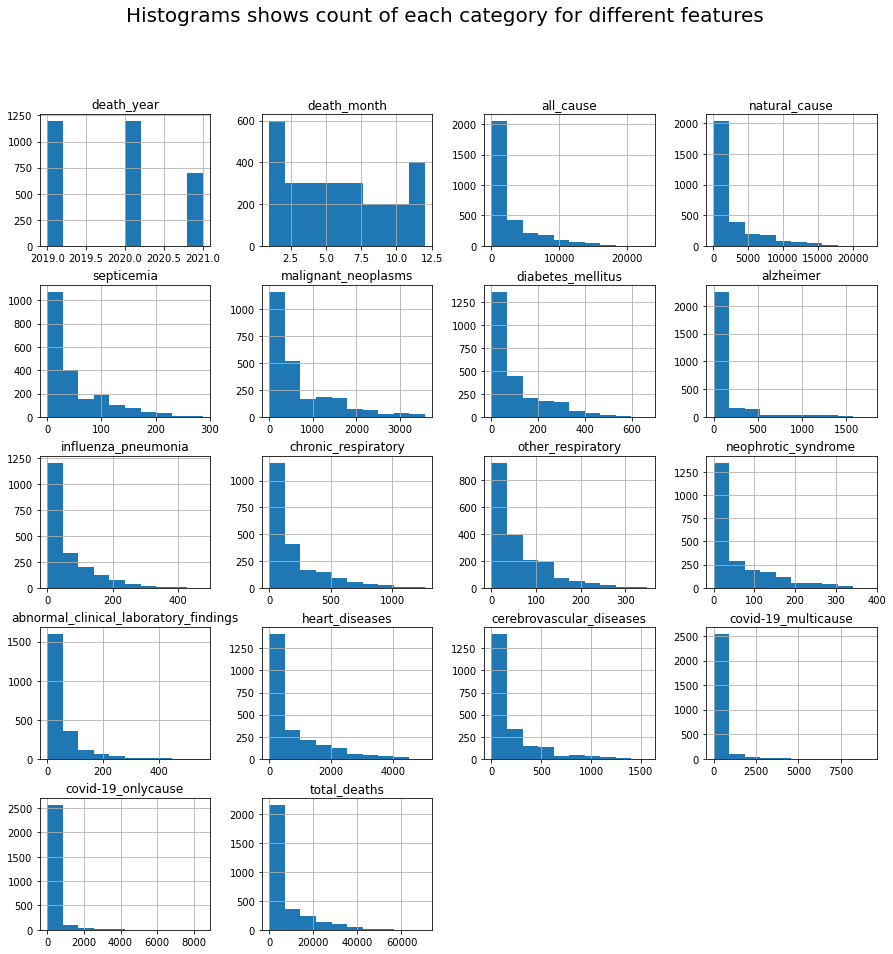

In [9]:
df.hist(figsize=(15,15))
plt.suptitle('Histograms shows count of each category for different features', fontsize=20);

Outcomes:
1) There are more deaths in 2019 and 2020 as compared to 2021.\
2) Also there are more deaths(two times) in January and February as compared to other months. \
3) There are less deaths due to COVID-19 as data is mostly left skewed.

# Data Cleaning

#### Removing irrelevant features

In [10]:
# dropping column "analysis_date" as it has no relevant significance
df.drop( ['analysis_date'], axis=1, inplace=True)
df.head(5)

,death_year,death_month,hhs_region,age_group,all_cause,natural_cause,septicemia,malignant_neoplasms,diabetes_mellitus,alzheimer,influenza_pneumonia,chronic_respiratory,other_respiratory,neophrotic_syndrome,abnormal_clinical_laboratory_findings,heart_diseases,cerebrovascular_diseases,covid-19_multicause,covid-19_onlycause,total_deaths
0,2019,1,Massachusetts,0-4 years,61.0,55.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,116
1,2019,1,Massachusetts,15-24 years,77.0,17.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,94
2,2019,1,Massachusetts,25-34 years,202.0,51.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,253
3,2019,1,Massachusetts,35-44 years,269.0,142.0,NaN,33.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,23.0,NaN,0.0,0.0,467
4,2019,1,Massachusetts,45-54 years,601.0,476.0,NaN,141.0,25.0,0.0,15.0,14.0,10.0,11.0,NaN,85.0,12.0,0.0,0.0,1390


#### Checking for Missing Values

In [11]:
total=df.isna().sum()   # total count
percent=df.isna().mean().round(4) * 100   # percent of missing values
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(20)


,Total,Percent
death_year,0,0.00
death_month,0,0.00
hhs_region,0,0.00
age_group,0,0.00
all_cause,10,0.32
natural_cause,68,2.19
septicemia,1018,32.84
malignant_neoplasms,669,21.58
diabetes_mellitus,608,19.61
alzheimer,360,11.61


<AxesSubplot:>

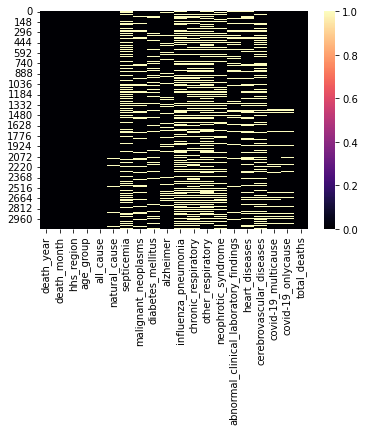

In [12]:
# Visualizing Null values using heatmap
sns.heatmap(df.isnull(), cmap = 'magma')

Handling missing values- Important question to ask yourself to help figure this out is: \
    Q) Is this value missing because it wasn't recorded or because it dosen't exist? 

Ways to handle missing values-
1) Replace it with mean/median/mode. \
2) Apply linear regression model to predict the values. \
3) Delete rows/columns if 70-80% missing values are present. \
4) Assign a unique or standard value depending upon the dataset. \
5) Imputer Method

In this case, as the missing values represents the count of deaths happened due to a particular disease we will replace it using 0.(It will have no impact on our observations)
    

In [13]:
# replacing missing values in dataset with 0
df.fillna(0, inplace = True) 

In [14]:
df.head(5)

,death_year,death_month,hhs_region,age_group,all_cause,natural_cause,septicemia,malignant_neoplasms,diabetes_mellitus,alzheimer,influenza_pneumonia,chronic_respiratory,other_respiratory,neophrotic_syndrome,abnormal_clinical_laboratory_findings,heart_diseases,cerebrovascular_diseases,covid-19_multicause,covid-19_onlycause,total_deaths
0,2019,1,Massachusetts,0-4 years,61.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116
1,2019,1,Massachusetts,15-24 years,77.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94
2,2019,1,Massachusetts,25-34 years,202.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,253
3,2019,1,Massachusetts,35-44 years,269.0,142.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,467
4,2019,1,Massachusetts,45-54 years,601.0,476.0,0.0,141.0,25.0,0.0,15.0,14.0,10.0,11.0,0.0,85.0,12.0,0.0,0.0,1390


#### Verifying the data types

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   death_year                             3100 non-null   int64  
 1   death_month                            3100 non-null   int64  
 2   hhs_region                             3100 non-null   object 
 3   age_group                              3100 non-null   object 
 4   all_cause                              3100 non-null   float64
 5   natural_cause                          3100 non-null   float64
 6   septicemia                             3100 non-null   float64
 7   malignant_neoplasms                    3100 non-null   float64
 8   diabetes_mellitus                      3100 non-null   float64
 9   alzheimer                              3100 non-null   float64
 10  influenza_pneumonia                    3100 non-null   float64
 11  chro

#### Correcting the inconsistent datatypes

In [16]:
# Using dictionary to convert specific columns types
convert_dict = {'all_cause':int,'natural_cause':int,'septicemia':int,'malignant_neoplasms':int,'diabetes_mellitus':int,'alzheimer':int,
    'influenza_pneumonia':int,'chronic_respiratory':int,'other_respiratory':int,'neophrotic_syndrome':int,
   'abnormal_clinical_laboratory_findings':int,'heart_diseases':int,'cerebrovascular_diseases':int,'covid-19_multicause':int
   ,'covid-19_onlycause':int}

df = df.astype(convert_dict)
print(df.dtypes)

death_year                                int64
death_month                               int64
hhs_region                               object
age_group                                object
all_cause                                 int32
natural_cause                             int32
septicemia                                int32
malignant_neoplasms                       int32
diabetes_mellitus                         int32
alzheimer                                 int32
influenza_pneumonia                       int32
chronic_respiratory                       int32
other_respiratory                         int32
neophrotic_syndrome                       int32
abnormal_clinical_laboratory_findings     int32
heart_diseases                            int32
cerebrovascular_diseases                  int32
covid-19_multicause                       int32
covid-19_onlycause                        int32
total_deaths                              int64
dtype: object


#### Checking for outliers

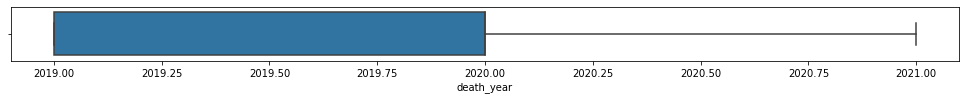

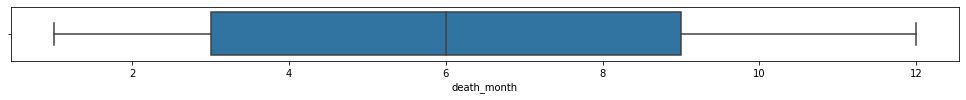

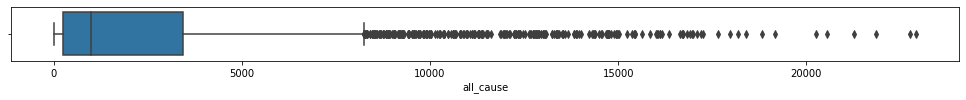

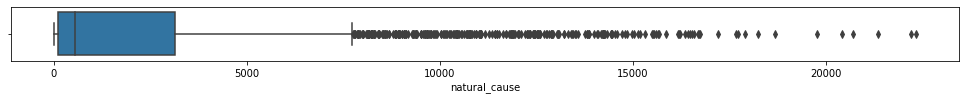

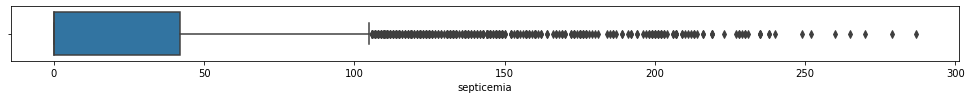

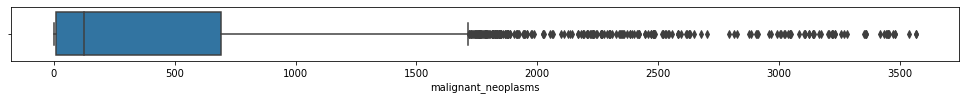

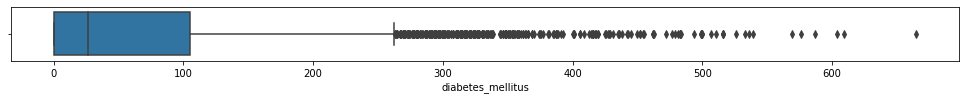

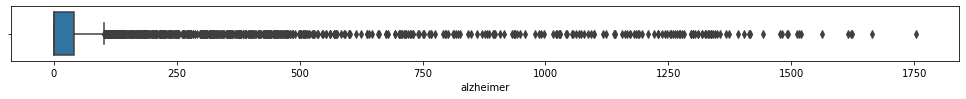

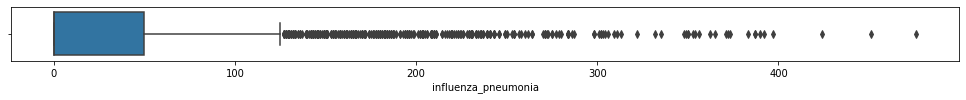

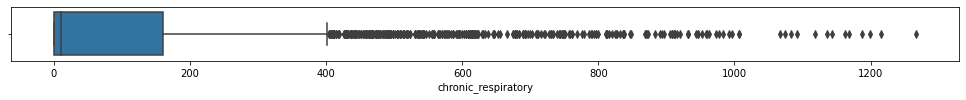

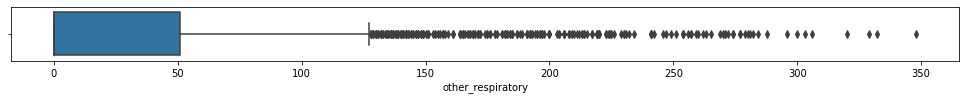

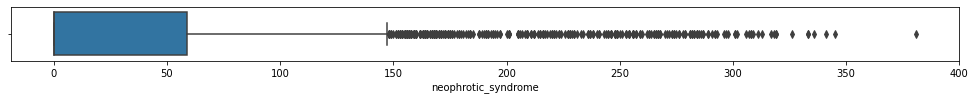

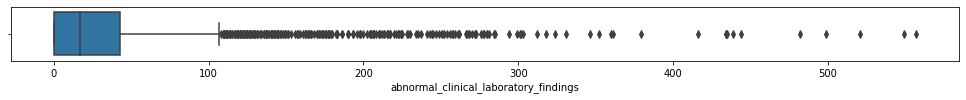

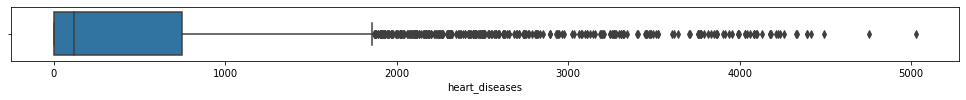

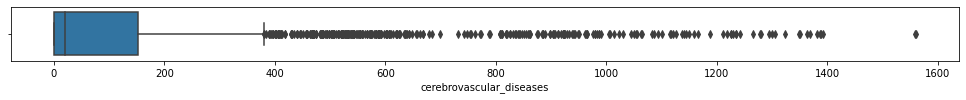

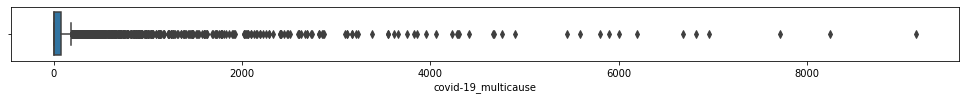

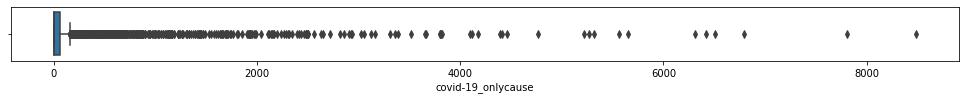

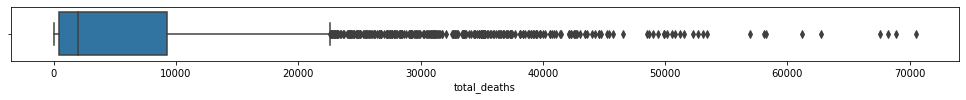

In [17]:
# Creating plot for numerical data
df1=df.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)


Important question to ask yourself to help figure this out -
Q) What is the reason for an outlier to exists in a dataset?

How to find outliers? 
1) Use Boxplot analysis \
2) Z-score statistics \
3) Using Scatter Plots \
4) Using IQR 

In this case, we can clearly see that some values are concentrated at 0 and most of the values are outside of boxplot. As there are many datapoints outside, we don't define them as outliers.

Also we can neglect the zero value and then draw the boxplot. But here we cannot neglect any outliers as the total count of deaths may get hampered, so we will neglect the outliers.

#### Converting Categorical Variables in Numerical Form (Encoding)


In [18]:
"""df = pd.get_dummies(df, columns=['age_group'])
df["age_0-4_years"]=df['age_group_0-4 years']
df.head(5)"""

'df = pd.get_dummies(df, columns=[\'age_group\'])\ndf["age_0-4_years"]=df[\'age_group_0-4 years\']\ndf.head(5)'

#### Extracting Dataset for analysis

In [19]:
df.to_csv("Cleaned_dataset.csv")

# Exploratory Data Analysis

Descriptive Statistics : Summarizing features and providing quantative summary about the features in dataset

#### Feature Selection : Correlation between numerical features of the dataset(Dimentionality Reduction)

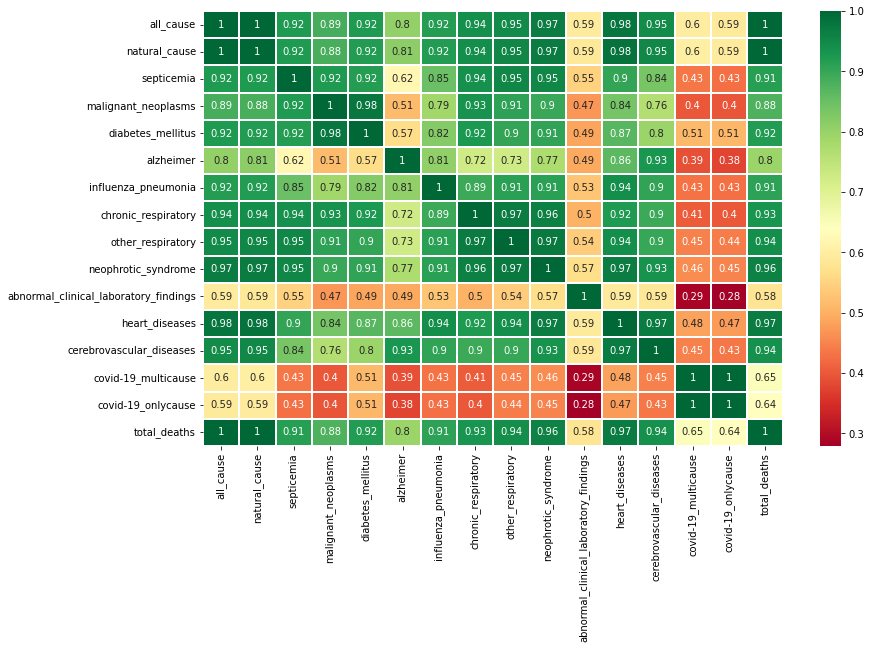

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))
sns.heatmap(df.corr().iloc[2:,2:], annot=True, 
            ax=ax, linewidth=2, cmap='RdYlGn')
plt.show()

Findings:
    
1) There is a strong positive correlation between (natural_cause & all_cause, heart_diseases & 
   cerebrovascular_diseases, covid-19_multicause & covid-19_onlycause) \
2) There is least correlation between covid-19_onlycause and abnormal_clinical_laboratory_findings) \
3) Here every feature is important as each feature dipicts a different disease.

#### Chi Square Test : The test is applied when you have two categorical variables from a single dataset. It is used to determine whether there is a significant association between the two variables.

Q) Is there any association between hhs region and age group?

(H0: There is no association between hhs region and age group \
 H1: There is association between hhs region and age group)

In [21]:
corr_table = pd.crosstab(df['hhs_region'],df['age_group'])
print(corr_table)

age_group      0-4 years  15-24 years  25-34 years  35-44 years  45-54 years  \
hhs_region                                                                     
California            31           31           31           31           31   
Colorado              31           31           31           31           31   
Georgia               31           31           31           31           31   
Illinois              31           31           31           31           31   
Kansas                31           31           31           31           31   
Massachusetts         62           62           62           62           62   
NewYork               31           31           31           31           31   
Texas                 31           31           31           31           31   
Washington            31           31           31           31           31   

age_group      5-14 years  55-64 years  65-74 years  75-84 years  \
hhs_region                                         

In [22]:
#Observed Values
Observed_Values = corr_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[31 31 31 31 31 31 31 31 31 31]
 [31 31 31 31 31 31 31 31 31 31]
 [31 31 31 31 31 31 31 31 31 31]
 [31 31 31 31 31 31 31 31 31 31]
 [31 31 31 31 31 31 31 31 31 31]
 [62 62 62 62 62 62 62 62 62 62]
 [31 31 31 31 31 31 31 31 31 31]
 [31 31 31 31 31 31 31 31 31 31]
 [31 31 31 31 31 31 31 31 31 31]]


In [23]:
val=stats.chi2_contingency(corr_table)
val

(0.0,
 1.0,
 72,
 array([[31., 31., 31., 31., 31., 31., 31., 31., 31., 31.],
        [31., 31., 31., 31., 31., 31., 31., 31., 31., 31.],
        [31., 31., 31., 31., 31., 31., 31., 31., 31., 31.],
        [31., 31., 31., 31., 31., 31., 31., 31., 31., 31.],
        [31., 31., 31., 31., 31., 31., 31., 31., 31., 31.],
        [62., 62., 62., 62., 62., 62., 62., 62., 62., 62.],
        [31., 31., 31., 31., 31., 31., 31., 31., 31., 31.],
        [31., 31., 31., 31., 31., 31., 31., 31., 31., 31.],
        [31., 31., 31., 31., 31., 31., 31., 31., 31., 31.]]))

In [24]:
Expected_Values=val[3]
no_of_rows=len(corr_table.iloc[0:,0])
no_of_columns=len(corr_table.iloc[0,0:])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 72


In [25]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [26]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.0


In [27]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables(hhs region and age group)")
else:
    print("Retain H0,There is no relationship between 2 categorical variables(hhs region and age group)")

critical_value: 92.80827038310771
Retain H0,There is no relationship between 2 categorical variables(hhs region and age group)


# Uni-Variate Analysis:

Q1) How is the distribution of death count due to natural causes?

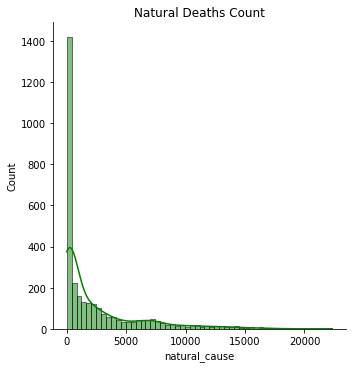

In [28]:
sns.displot(df.natural_cause,kde=True, color='g')
plt.title("Natural Deaths Count")
plt.show()

Answer: This shows that there are more than 1400 -  '0'  values in our dataset. That means that around 45% of the data has 0 values.  

Q2) How many statewise death records are present in our dataset?

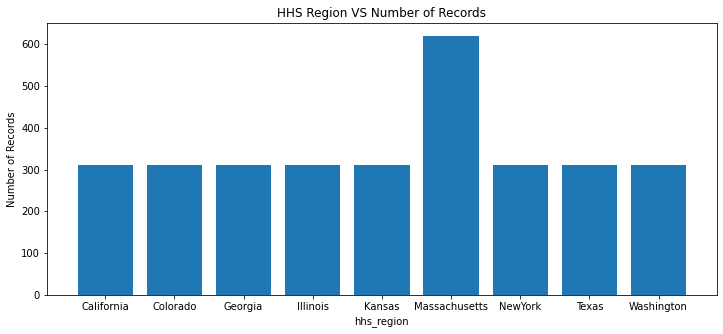

In [29]:
count_info = df[["hhs_region"]]
count_info = df.groupby(['hhs_region']).size().reset_index(name='Count')
plt.figure(figsize= (12,5))
plt.bar(count_info['hhs_region'],count_info['Count'])
plt.title("HHS Region VS Number of Records")
plt.xlabel("hhs_region")
plt.ylabel("Number of Records")
plt.show()

Answer: This shows us that we have 620 records from Massachusetts and 310 records from other states.

As uni-variate analysis deals with only one feature at a time, so we cannot find interesting correlations in our dataset. Most of the time the data seem to be misrepresented. So we perform Bi-variate and Multi-variate analysis.

# Bi-Variate Analysis : 

Q3) Which disease caused highest and lowest number of deaths from 2019 to 2021?

In [30]:
df2 = df.loc[1:3101, 'all_cause' : 'covid-19_onlycause']
print(df2.sum())

all_cause                                8139677
natural_cause                            7450110
septicemia                                 97871
malignant_neoplasms                      1539724
diabetes_mellitus                         243954
alzheimer                                 321485
influenza_pneumonia                       122039
chronic_respiratory                       384696
other_respiratory                         110963
neophrotic_syndrome                       131925
abnormal_clinical_laboratory_findings     112161
heart_diseases                           1738014
cerebrovascular_diseases                  399050
covid-19_multicause                       611115
covid-19_onlycause                        551470
dtype: int64


Answer: The highest number of deaths are because of all_cause and the lowest are due to septicemia.

Q4) Which Age-group has maximum and minimum number of deaths from 2019 to 2021? (This will give us idea about number of deaths prevalent in certain age-groups)

In [31]:
age_info = df[["total_deaths","age_group"]]
age_info = age_info.groupby("age_group",as_index=False).sum()
age_info

,age_group,total_deaths
0,0-4 years,120451
1,15-24 years,115219
2,25-34 years,278144
3,35-44 years,504876
4,45-54 years,1139383
5,5-14 years,22800
6,55-64 years,2901496
7,65-74 years,4599674
8,75-84 years,5566671
9,85 years and over,6705656


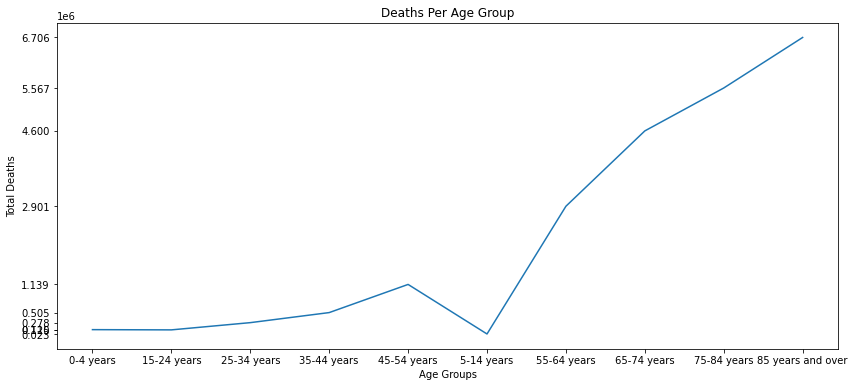

In [32]:
plt.figure(figsize= (14,6))
plt.plot(age_info['age_group'], age_info['total_deaths'])
plt.xlabel("Age Groups")
plt.ylabel("Total Deaths")
plt.yticks(age_info['total_deaths'])
plt.title("Deaths Per Age Group")
plt.show()  # show first chart

Answer:
1) Maximum number of deaths are in age group 85 years and over.  \
2) Minimum number of deaths are in age group between Age 5-14 years

Q5) Which region has maximum deaths in age group 0-14 years from 2019 to 2021?

In [33]:
# copy dataframe, drop columns, filter data

df5 = df
df5 = df5.drop(df5.columns.difference(['hhs_region','total_deaths','age_group']),axis=1)
filt = ["0-4 years","5-14 years"]
df5 = df5[df5.age_group.isin(filt)]
df5 = df5.groupby("hhs_region",as_index=False).sum()
print(df5)


      hhs_region  total_deaths
0     California         18039
1       Colorado          5322
2        Georgia         34641
3       Illinois         24306
4         Kansas          6634
5  Massachusetts          8598
6        NewYork          8879
7          Texas         22734
8     Washington         14098


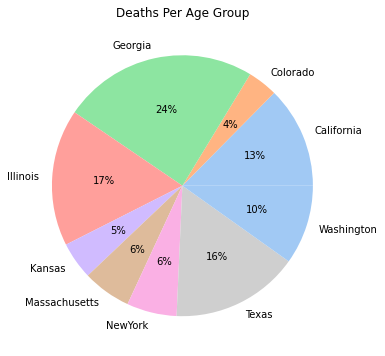

In [34]:
#define data
data = df5.total_deaths
labels = df5.hhs_region

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:8]

plt.figure(figsize= (14,6))
plt.title("Deaths Per Age Group")
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Answer: The maximum deaths are found in Georgia in Age group 0-14 years.

Q6) Which month of the year has recorded the highest and lowest mortality rate?

In [35]:
month_info = df[['total_deaths','death_month']]
month_info.groupby("death_month",as_index=False).sum().sort_values(by='total_deaths',ascending=False)
month_info

,total_deaths,death_month
0,116,1
1,94,1
2,253,1
3,467,1
4,1390,1
...,...,...
3095,29,7
3096,3160,7
3097,6149,7
3098,6707,7


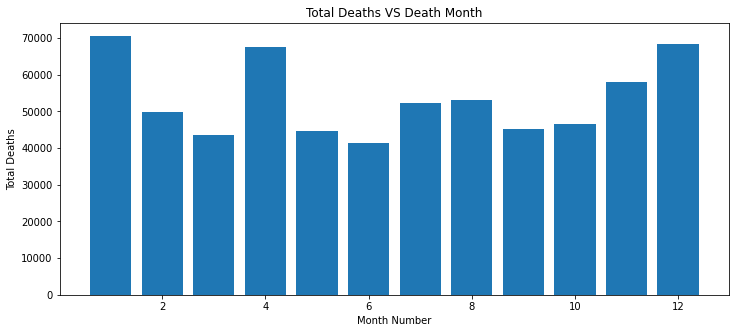

In [36]:
plt.figure(figsize= (12,5))
plt.bar(month_info['death_month'],month_info['total_deaths'])
plt.title("Total Deaths VS Death Month")
plt.xlabel("Month Number")
plt.ylabel("Total Deaths")
plt.show()

Answer: Highest deaths in Month 1 (January) and lowest deaths in Month 9 (September)

Q7) Which are the age groups where heart disease is more common?


In [37]:
hd_info = df[["heart_diseases","age_group"]]
hd_info = hd_info.groupby("age_group",as_index=False).sum().sort_values(by='heart_diseases',ascending=False)
hd_info

,age_group,heart_diseases
9,85 years and over,642148
8,75-84 years,419590
7,65-74 years,334615
6,55-64 years,218163
4,45-54 years,83662
3,35-44 years,29171
2,25-34 years,9187
1,15-24 years,1316
0,0-4 years,162
5,5-14 years,0


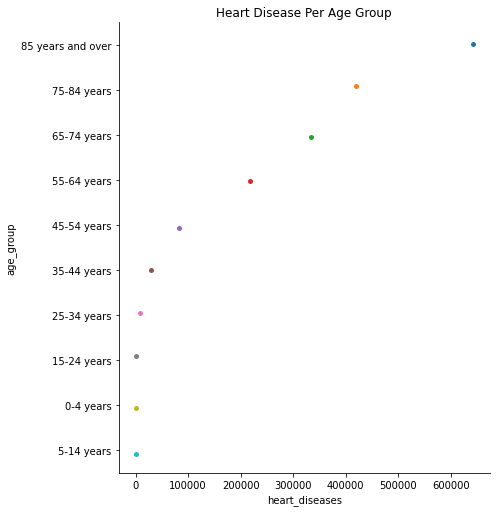

In [38]:
# using the function catplot to make a categorical scatterplot
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
sns.catplot("heart_diseases","age_group",data=hd_info,orient="h",height=7)
plt.title("Heart Disease Per Age Group")
plt.show()

Answer: Heart Diseases are more common in age_group 85 years and over.

# Multi-variate Analysis

Q8) In which two regions more people died due to diseases(excluding natural cause)?

In [39]:
cmp_info = df[["natural_cause",'total_deaths',"hhs_region"]]
cmp_info = cmp_info.groupby("hhs_region",as_index=False).sum()
cmp_info["total_deaths - natural_cause"] = cmp_info["total_deaths"]-cmp_info["natural_cause"]
cmp_info

,hhs_region,natural_cause,total_deaths,total_deaths - natural_cause
0,California,989025,2938435,1949410
1,Colorado,226603,662196,435593
2,Georgia,1675707,4940376,3264669
3,Illinois,1272694,3739472,2466778
4,Kansas,356962,1044120,687158
5,Massachusetts,623822,1801937,1178115
6,NewYork,637569,1900002,1262433
7,Texas,918409,2728945,1810536
8,Washington,749374,2198887,1449513


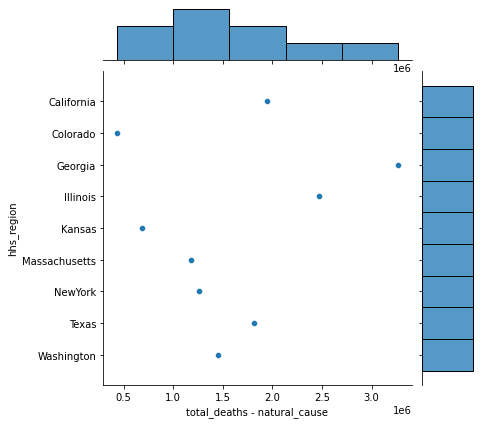

In [40]:
sns.jointplot(y='hhs_region',x='total_deaths - natural_cause',data=cmp_info)

Answer: In Georgia and Illinois, more people are dying from diseases(exclude natural cause). 

Q9) Compare COVID-19(Multicause and onlycause) regionwise and check which region has more deaths due to COVID-19 onlycause.

In [41]:
cmp_info1 = df[["covid-19_multicause",'covid-19_onlycause',"hhs_region"]]
cmp_info1 = cmp_info1.groupby("hhs_region",as_index=False).sum()

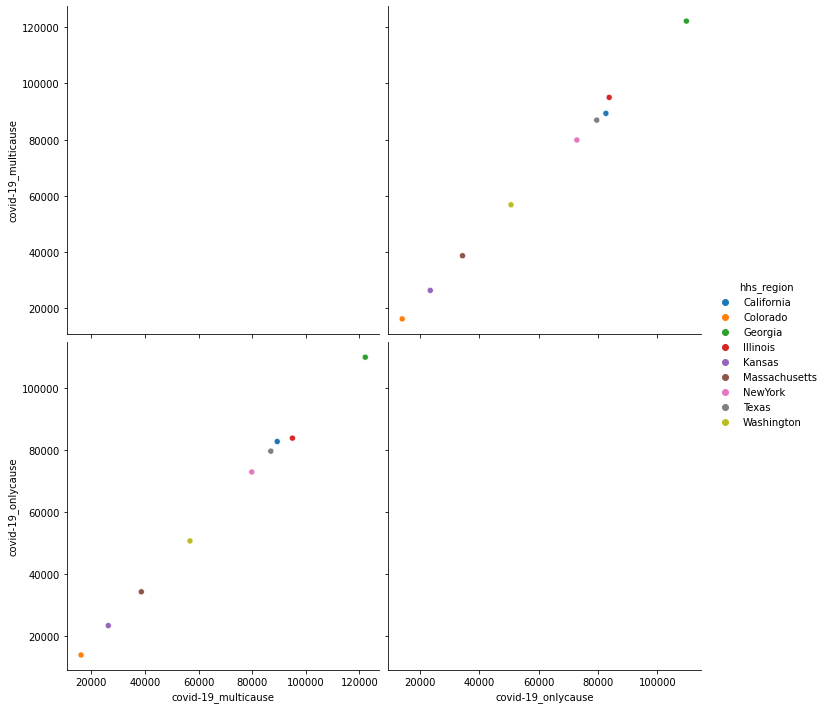

In [42]:
sns.pairplot(cmp_info1,hue="hhs_region", height=5)

Answer: There are more deaths in Georgia due to covid-19 onlycause.



#### CONCLUSION : 

1) Important diseases to determine deaths is heart diseases.\
2) Mortality rate is more at older age group than younger age maybe because most of the deaths at older age happen due to heart diseases or naturally. \
3) Georgia and Illinois has high mortality rate for COVID-19 among all the regions. \
4) There are more deaths in 2020 as compared to other years and most in the months of January and December. 

#### LIMITATIONS : 
1) While analysing the deaths, it is essential to know the total population of the region at that time(crude death rate) which is not provided in our dataset. \
2) Also, data is incomplete for the year 2021, if complete data would have been provided, then we would be able to make more accurate analysis.
